# 16. 군집분석

## 16.1 핵심 개념

**군집분석(cluster analysis) 는 개체들의 특성을 대표하는 몇 개의 변수들을 기준으로 그룹을 세분화 하는 기법**이다. 개체들간 유사성은 개체간 거리를 기준으로 판단하며, 대표적으로 유클리디안 거리를 기준으로 사용합니다.

## 16.2 scikit-learn

**군집분석은 sklearn.cluster 패키지**에 속해 있습니다. 이중 **KMeans 가 대표적인 군집분석 알고리즘**입니다.

|sklearn.cluster|Clustering|
|:--|:--|
|sklearn.cluster.AffinityPropagation() |Perform Affinity Propagation Clustering of data. |
|sklearn.cluster.AgglomerativeClustering() |Agglomerative Clustering. |
|sklearn.cluster.Birch() |Implements the BIRCH clustering algorithm. |
|sklearn.cluster.DBSCAN() |Perform DBSCAN clustering from vector array of distance matrix. |
|sklearn.cluster.FeatureAgglomeration() |Agglomerate features.|
|**sklearn.cluster.KMeans()** |K-Means clustering|
|sklearn.cluster.MiniBatchMean() |Min-Batch K-Means clustering.|
|sklearn.cluster.MeanShift() |Mean shift clustering using a flat kernel.|
|sklearn.cluster.OPTICS() |Estimate clustering structure from vector array.|
|sklearn.cluster.SpectralClustering() |Apply clustering to a projection of the normalized Laplacian. |
|sklearn.cluster.SpectralBiclustering() |Spectral biclustering (Kluger, 2003) |
|sklearn.cluster.SpectralCoclustering() |Spectral Co-Clustering algorithm (Dhillion, 2001). |

하이퍼 파라미터로 n_cluster 값이 있습니다.

|Hyper Parameter||
|:--|:--|
|n_cluster |군집의 수|


## 16.3 분석 코드

▶ Core Clustering

In [1]:
# 군집분석 을 위한 코드 셋팅
import warnings
warnings.filterwarnings("ignore")

# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans

In [3]:
# 데이터 로드
data = pd.read_csv('./extrafiles/Mall_Customers.csv')
X = data.iloc[:, [3, 4]]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


최적의 군집수는 직접 찾아야 한다. **핵심은 군집수를 1~21개 까지 늘려보면서 kmeans.inertia_값을 살펴보아야 한다.** <u>'kmeans.inertia_' 는 군집의 중심과 각 개체간의 거리를 계산한 값</u>이다. 중심과 개체간 거리를 적게 계싼하면 그만큼 군집이 작은 규모로 형성 된다는 것을 이해해야한다.

In [5]:
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)
    
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25321.07729345122,
 21826.936303231643,
 20157.314243624583,
 17768.48837959426,
 16029.128396871944,
 14590.300003225351,
 13141.474003567115,
 11714.62840980858,
 10852.59172624406,
 10058.43011643529,
 9893.261157701945,
 8955.829168200224,
 8361.189779253142]

보다 시피 n_clusters 파라미터가 작은 값일수록 inertia_ 값은 커지는 경향이 있다. 하지만 무조건 cluster 값을 작게 잡기보다 최적의 값을 찾는것이 중요하다.

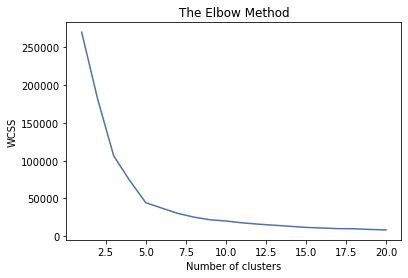

In [6]:
plt.figure()
plt.plot(range(1, 21), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
k = 5
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [9]:
Group_cluster = pd.DataFrame(y_kmeans)
Group_cluster.columns=['Group']
full_data = pd.concat([data, Group_cluster], axis=1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [10]:
kmeans_pred = KMeans(n_clusters=k, random_state=42).fit(X)
kmeans_pred.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [11]:
kmeans_pred.predict([[100, 50], [30, 80]])

array([4, 3])

In [13]:
labels = [('Cluster ' + str(i+1)) for i in range(k)]
labels

['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

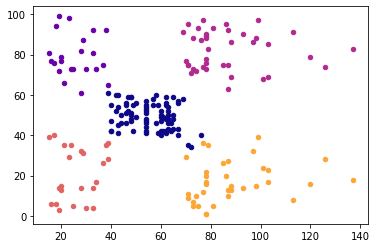

In [17]:
X = np.array(X)
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20, c = cmap(i/k), label = labels[i])

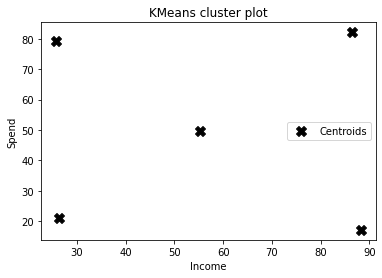

In [22]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('KMeans cluster plot')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

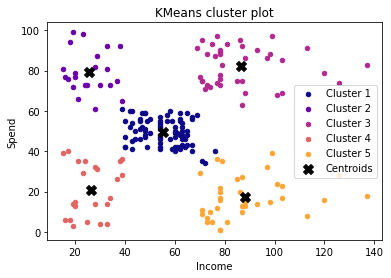

In [24]:
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20, c = cmap(i/k), label=labels[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('KMeans cluster plot')
plt.legend()
plt.show()

▶ K-mean Clustering

In [63]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = pd.read_csv("./extrafiles/iris.csv")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [30]:
x_iris = iris.drop(["class"], axis=1)
y_iris = iris["class"]
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y_iris.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [31]:
x_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_iris)
X_scale = scaler.transform(x_iris)
pd.DataFrame(X_scale).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [36]:
K = range(1, 10)
KM = [KMeans(n_clusters=k).fit(X_scale) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [37]:
D_k = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]
D_k

[array([[ 6.34507683],
        [ 5.91692488],
        [ 5.83609458],
        [ 5.7497826 ],
        [ 6.32139225],
        [ 6.88621812],
        [ 5.8966092 ],
        [ 6.23297682],
        [ 5.45618915],
        [ 5.98999165],
        [ 6.71863081],
        [ 6.09918027],
        [ 5.83180932],
        [ 5.35817133],
        [ 7.14982517],
        [ 7.36613874],
        [ 6.79852925],
        [ 6.34901567],
        [ 7.06470098],
        [ 6.54140658],
        [ 6.60681466],
        [ 6.48922183],
        [ 5.92958683],
        [ 6.32771681],
        [ 6.18465844],
        [ 6.04979338],
        [ 6.26737585],
        [ 6.44825558],
        [ 6.37181293],
        [ 5.91016074],
        [ 5.93717104],
        [ 6.56734345],
        [ 6.79043445],
        [ 7.06328535],
        [ 5.98999165],
        [ 6.05970296],
        [ 6.65056389],
        [ 5.98999165],
        [ 5.48543526],
        [ 6.31347765],
        [ 6.24739946],
        [ 5.22685374],
        [ 5.59732079],
        [ 6

In [44]:
cldx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/X_scale.shape[0] for d in dist]

In [45]:
# Total with-in sumof square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X_scale)**2)/X_scale.shape[0]
bss = tss-wcss

Text(0, 0.5, 'Average within-cluster sum of squares')

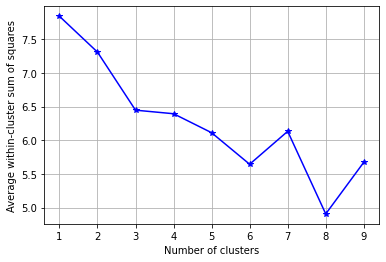

In [46]:
# elbow curve - Avg. within-cluster sum of squares
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
# plt.title('Elbow for KMeans clustering')

Text(0, 0.5, 'Percentage of variance explained')

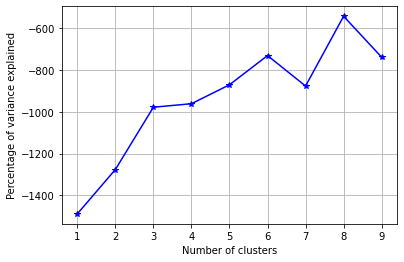

In [48]:
# elbow curve - percentage of variance explained
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
# plt.title('Elbow for KMeans clustering')

In [49]:
# Calculation of eigencentors & eigenvalues
import numpy as np
w, v = np.linalg.eig(np.array([[ 0.91335, 0.755969], [0.75969, 0.69702]]))

print("\nEigen Values\n", w)
print("\nEigen Vectors\n", v)


Eigen Values
 [1.57069252 0.03967748]

Eigen Vectors
 [[ 0.75461631 -0.65433034]
 [ 0.65616631  0.75620884]]


In [54]:
#
k_means_fit = KMeans(n_clusters=4, max_iter=300)
k_means_fit.fit(X_scale)

k_means_fit.cluster_centers_

array([[-1.3014672 ,  0.20434662, -1.30846527, -1.29780677],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256],
       [-0.70378338,  1.53343032, -1.30099253, -1.20889396]])

In [55]:
print("\nK-Means Clustering - Confusion Matrix\n\n", pd.crosstab(y_iris, k_means_fit.labels_, 
                                                                 rownames = ["Actuall"], colnames = ["Predicated"]))


K-Means Clustering - Confusion Matrix

 Predicated        0   1   2   3
Actuall                        
Iris-setosa      26   0   0  24
Iris-versicolor   0  39  11   0
Iris-virginica    0  17  33   0


In [61]:
print("\nSilhouette-score : %0.3f" % silhouette_score(x_iris, k_means_fit.labels_, metric='euclidean'))


Silhouette-score : 0.353


In [62]:
for k in range(2, 10):
    k_means_fitk = KMeans(n_clusters=k, max_iter=300)
    k_means_fitk.fit(x_iris)
    print("FOr K value", k, ", Silhouette-score: %0.3f" % silhouette_score(x_iris, k_means_fitk.labels_, metric='euclidean'))

FOr K value 2 , Silhouette-score: 0.681
FOr K value 3 , Silhouette-score: 0.553
FOr K value 4 , Silhouette-score: 0.497
FOr K value 5 , Silhouette-score: 0.489
FOr K value 6 , Silhouette-score: 0.367
FOr K value 7 , Silhouette-score: 0.356
FOr K value 8 , Silhouette-score: 0.348
FOr K value 9 , Silhouette-score: 0.345


▶ Hierarchical Clustering

이번에는 계층적 군집 분석을 수행해 보겠습니다. k-means 는 비계층적 방법이라고도 하며, 분석 속도가 빠르고 군집을 형성 하면서 유연하게 다른 군집으로 재 군집화가 가능한 반면, 계층적 군집분석은 한번 어떤 군집에 속한 개체는 분석과정에서 다른 군집과 더 가깝게 계산 되어도 재군집화가 허용되지 않고 속도도 더 오래 걸리는 차이점이 존재합니다.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-deep")

import matplotlib.cm
cmap = matplotlib.cm.get_cmap("plasma")

In [68]:
# reading in data
data = pd.read_csv("./extrafiles/Mall_Customers.csv")
X = data.iloc[:,[3, 4]].values

In [70]:
# DEndrogram to choose number of clusters (k)
import scipy.cluster.hierarchy as sch

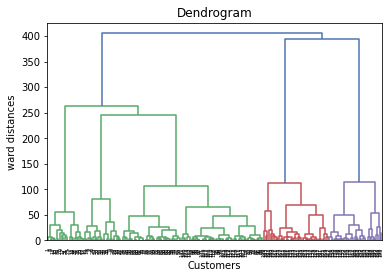

In [71]:
plt.figure(1)
z = sch.linkage(X, method ='ward')
dendrogram = sch.dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ward distances')
plt.show()

In [72]:
k = 5
# Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = 'ward')
y_hc = hc.fit_predict(X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

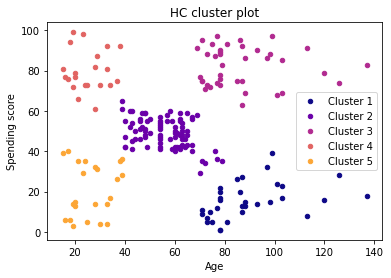

In [74]:
labels = [('Cluster ' + str(i+1)) for i in range(k)]
plt.figure(2)
for i in range(k):
    plt.scatter(X[y_hc ==i, 0], X[y_hc == i, 1], s = 20, c = cmap(i/k), label=labels[i])

plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('HC cluster plot')
plt.legend()
plt.show()